**CodeAlpha Task 2**

**Stock Price Prediction Model on APPLE's Dataset
by ABU BAKAR SIDDIQ**

**Stock Price Prediction
Take stock price of any company you want and predicts
its price by using LSTM.**

**Importing All Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

**Loading the Dataset**

In [39]:
file_path = 'APPLE_DATA_SET.csv'
apple_data = pd.read_csv(file_path)

**Discovering the APPLE DataSet**

In [40]:
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/1980,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,12/15/1980,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,12/16/1980,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,12/17/1980,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,12/18/1980,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [22]:
apple_data.shape

(10468, 7)

In [23]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [24]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [25]:
apple_data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
10463,False,False,False,False,False,False,False
10464,False,False,False,False,False,False,False
10465,False,False,False,False,False,False,False
10466,False,False,False,False,False,False,False


In [26]:
apple_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


**Checking for Missing Values & Date Feature**

In [ ]:
apple_data.dropna(inplace=True)
apple_data = apple_data.drop_duplicates()

if 'Date' in apple_data.columns:
    apple_data['Date'] = pd.to_datetime(apple_data['Date'])
    apple_data.set_index('Date', inplace=True)

**Creating 2 additional features**

In [ ]:
apple_data['MA20'] = apple_data['Close'].rolling(window=20).mean()
apple_data['MA50'] = apple_data['Close'].rolling(window=50).mean()

**Dropping rows with NaN values**

In [ ]:
apple_data.dropna(inplace=True)

**Selecting features for prediction**

In [ ]:
features = ['Close', 'Volume', 'Open', 'High', 'Low', 'MA20', 'MA50']
data = apple_data[features]

**Normalizing the data**

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

**Performing PCA for dimensionality reduction**

In [ ]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_data)

**Function to creating Sequences**

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 60

X, y = create_sequences(pca_data, seq_length)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

**Splitting DataSet Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Building LSTM-GRU-Bidirectional model**

In [ ]:
model = Sequential()

**Bidirectional LSTM Layer**

In [ ]:
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))

**Adding GRU Layer**

In [ ]:
model.add(GRU(units=100, return_sequences=False))
model.add(Dropout(0.3))

**Adding Fully Connected Layers**

In [ ]:
model.add(Dense(units=5))
model.add(Dense(units=1))

**Compiling the Model**

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

**Early stopping to prevent overfitting**

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

**Training the Model**

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

**Early stopping to prevent overfitting**

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

**Make predictions**

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.c_[predictions, np.zeros((len(predictions), len(features) - 1))])[:, 0]
y_test_scaled = scaler.inverse_transform(np.c_[y_test, np.zeros((len(y_test), len(features) - 1))])[:, 0]

**Evaluating Metrics**

In [ ]:
r2 = r2_score(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)
mse = mean_squared_error(y_test_scaled, predictions)
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

**Displaying Actual/Predicted Prices & Correct/Incorrect Prices**

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test_scaled.flatten(),
    'Predicted': predictions.flatten()
}, index=apple_data.index[len(apple_data) - len(y_test_scaled):])

if not pd.api.types.is_datetime64_any_dtype(comparison_df.index):
    comparison_df.index = pd.to_datetime(comparison_df.index)

comparison_df['Correct'] = np.sign(comparison_df['Actual'].diff()) == np.sign(comparison_df['Predicted'].diff())
correct_predictions = comparison_df['Correct'].sum()
incorrect_predictions = len(comparison_df) - correct_predictions

print(f"Number of correct predictions: {correct_predictions}")
print(f"Number of incorrect predictions: {incorrect_predictions}")

**Plotting Actual vs Predicted Stock Prices**

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual Price', color='blue', linewidth=2)
plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted Price', color='red', linestyle='--', linewidth=2)
plt.title('Apple Stock Price Prediction: Actual vs Predicted', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Stock Price (USD)', fontsize=14, fontweight='bold')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

**Plotting Correct vs Incorrect Predictions**

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 44s 287ms/step - loss: 0.0034 - val_loss: 5.5708e-04
Epoch 2/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 284ms/step - loss: 1.8453e-04 - val_loss: 6.0176e-04
Epoch 3/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 38s 293ms/step - loss: 1.3578e-04 - val_loss: 3.1155e-04
Epoch 4/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 38s 272ms/step - loss: 1.0649e-04 - val_loss: 5.6368e-04
Epoch 5/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 272ms/step - loss: 8.1778e-05 - val_loss: 9.3424e-04
Test Loss: 0.0003115514409728348
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step
R² Score: 0.9992
Mean Absolute Error (MAE): 1.8504
Mean Squared Error (MSE): 10.3154
Number of correct predictions: 1287
Number of incorrect predictions: 785


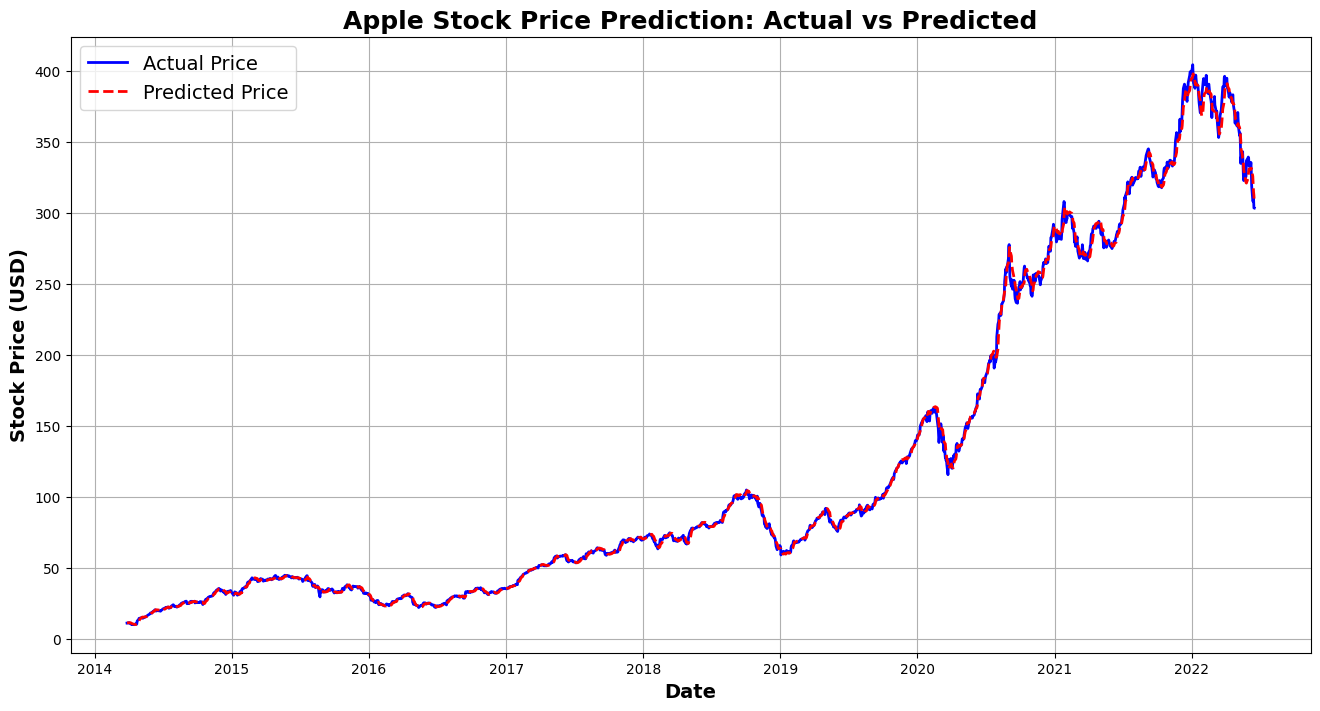

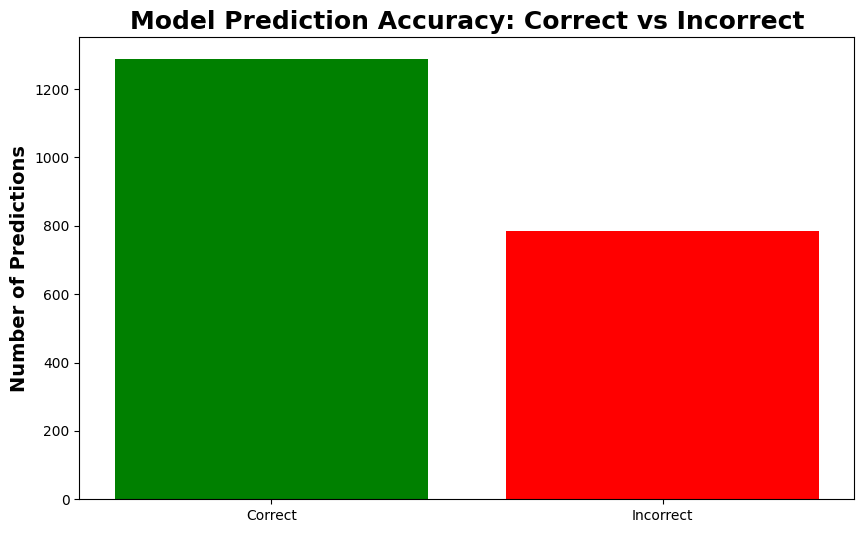

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(['Correct', 'Incorrect'], [correct_predictions, incorrect_predictions], color=['green', 'red'])
plt.title('Model Prediction Accuracy: Correct vs Incorrect', fontsize=18, fontweight='bold')
plt.ylabel('Number of Predictions', fontsize=14, fontweight='bold')
plt.show()